In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
dataset = pd.read_excel("../data/HousePricePrediction.xlsx")
print(dataset.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [47]:
dataset.shape

(2919, 13)

### Preprocessing

In [48]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Interger variables:", len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 4
Interger variables: 0
Float variables: 3


In [49]:
print(obj[obj].index)

Index(['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'], dtype='object')


<Axes: >

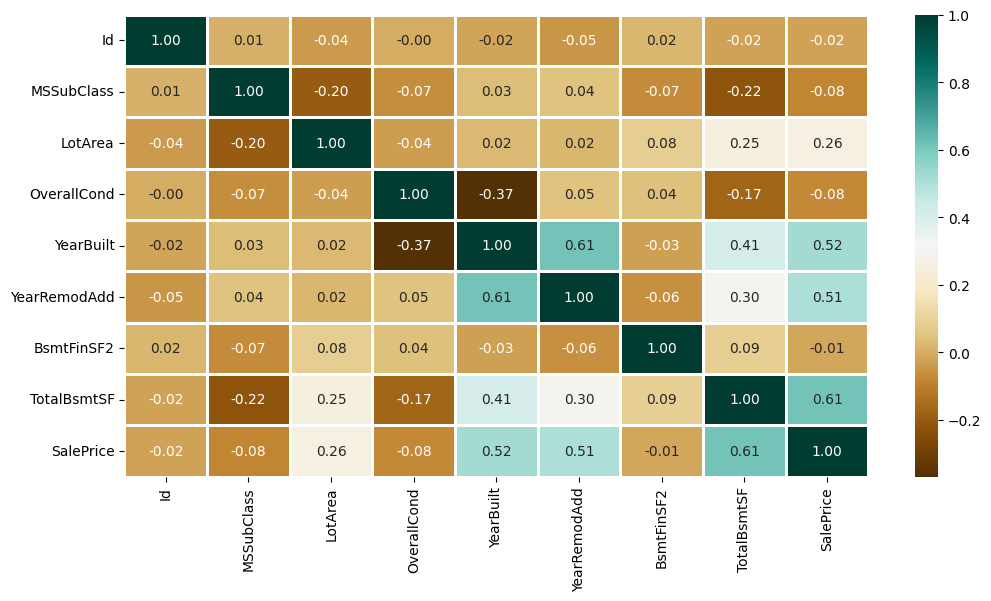

In [50]:
numeric_dataset = dataset.select_dtypes(include=[int, float])

plt.figure(figsize=(12, 6))
sns.heatmap(numeric_dataset.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

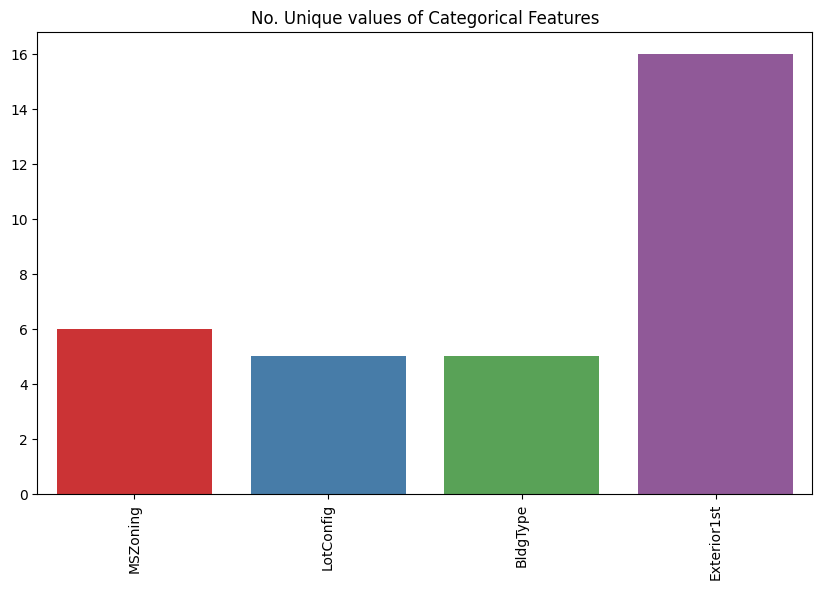

In [51]:
unique_values = []
for col in object_cols:
    unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10, 6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols, y=unique_values, hue=object_cols, palette='Set1', legend=False)

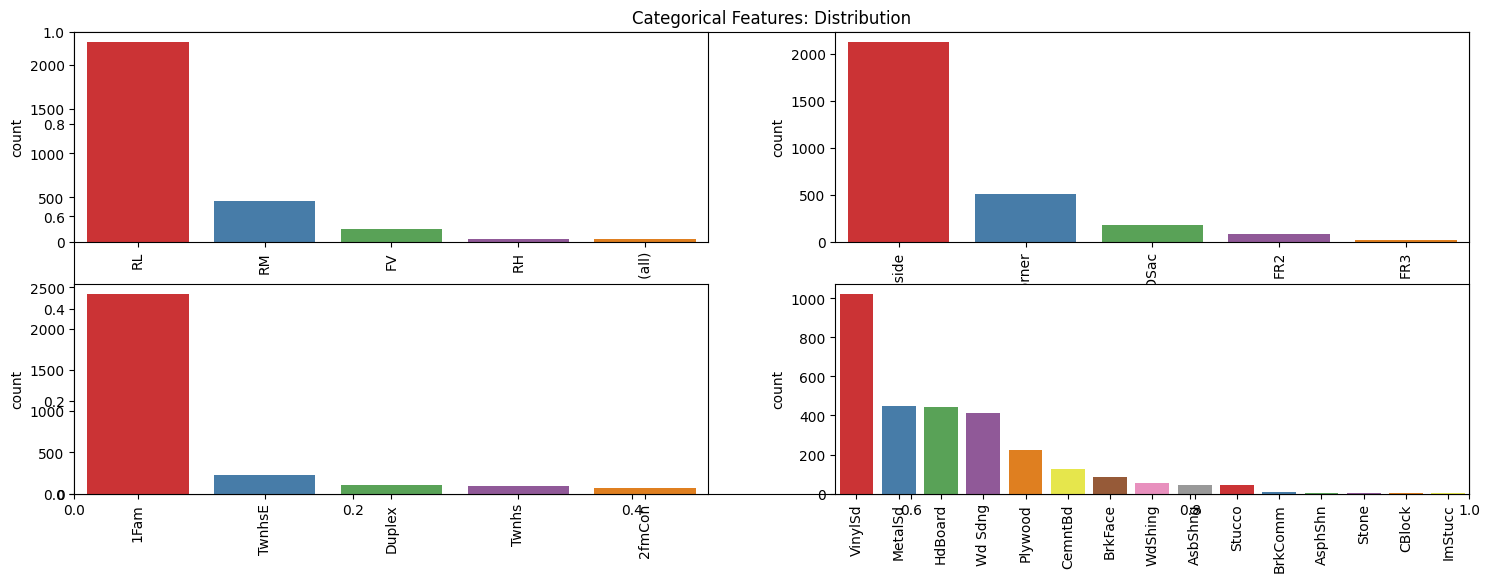

In [61]:
plt.figure(figsize=(18, 6))
plt.title('Categorical Features: Distribution')
index = 1

for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(2, 2, index)
    sns.barplot(x=list(y.index), y=y, hue=list(y.index), palette='Set1')
    plt.xticks(rotation=90)
    index +=1

In [ ]:
dataset.drop(['Id'], axis=1, inplace=True)